# LAMA: LightAutoML

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Развернем библиотеку lightautoml

In [ ]:
!pip install -U lightautoml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.4/416.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.7/215.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 22.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.5/309.5 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 55.4 

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
import torch

# Imports from our package
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task

In [ ]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn. metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from xgboost import XGBClassifier

In [ ]:
# для воспроизводимости результатов зафиксируем сид
random_state = 42
n_threads = 4 # число потоков, которые будут обрабатывать данные
np.random.seed(random_state)
torch.set_num_threads(n_threads)

## Load Dataset

In [ ]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
data = pd.read_csv('/content/drive/MyDrive/Datasets/adult.csv', names=col_names)
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Описание набора данных "Adult":

| Характеристика | Описание |
| --- | --- |
| Название | Adult (Census Income) |
| Дата добавления | 30 апреля 1996 |
| Задача | Предсказать, превышает ли доход человека $50,000 в год на основе данных переписи населения. |
| Предметная область | Социальные науки |
| Тип задачи | Классификация |
| Тип характеристик | Категориальные, целочисленные |
| Количество наблюдений | 48842 |
| Количество характеристик | 14 |
| Отсутствующие значения | Да |

### Описание переменных:

| Имя переменной | Роль | Тип | Демография | Описание | Единицы | Отсутствующие значения |
| --- | --- | --- | --- | --- | --- | --- |
| age | Характеристика | Целое | Возраст | - | - | Нет |
| workclass | Характеристика | Категориальный | Доход | Работает у частного работодателя, самозанятый без сотрудников, самозанятый с сотрудниками, федеральное правительство, местное правительство, государственное правительство, без оплаты, никогда не работал. | - | Да |
| fnlwgt | Характеристика | Целое | - | - | - | Нет |
| education | Характеристика | Категориальный | Уровень образования | Бакалавр, некоторое количество курсов в колледже, 11-й класс, окончил среднюю школу, профессиональная школа, аспирантура, профессиональное образование, 9-й класс, 7-8-й классы, 12-й класс, магистр, 1-4-й классы, 10-й класс, доктор наук, 5-6-й классы, дошкольное образование. | - | Нет |
| education-num | Характеристика | Целое | Уровень образования | - | - | Нет |
| marital-status | Характеристика | Категориальный | Другое | Женаты, разведены, никогда не были женаты, живут раздельно, овдовели, женаты, но супруг отсутствует, женаты на члене вооруженных сил. | - | Нет |
| occupation | Характеристика | Категориальный | Другое | Специалист по технической поддержке, ремесленник, работник обслуживания, продажи, менеджер, профессионал, рабочие физического труда, инспектор, клерк, сельское хозяйство и рыболовство, транспорт, частный домохозяин, полиция, вооруженные силы. | - | Да |
| relationship | Характеристика | Категориальный | Другое | Супруга, собственный ребенок, муж, не родственник, другой родственник, неженатый. | - | Нет |
| race | Характеристика | Категориальный | Раса | Белый, азиат или житель тихоокеанского региона, индеец или эскимос, другое, черный. | - | Нет |
| sex | Характеристика | Бинарный | Пол | Женщина, мужчина. | - | Нет |
| capital-gain | Характеристика | Целое | - | - | - | Нет |
| capital-loss | Характеристика | Целое | - | - | - | Нет |
| hours-per-week | Характеристика | Целое | - | - | - | Нет |
| native-country | Характеристика | Категориальный | Другое | Страна рождения (США, Камбоджа, Англия, Пуэрто-Рико, Канада, Германия и т.д.) | - | Да |
| income | Целевая переменная | Бинарный | Доход | >50K, <=50K. | - | Нет |


## Exploratory Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Видим, что в наборе данных пропусков нет

In [ ]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
data.describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


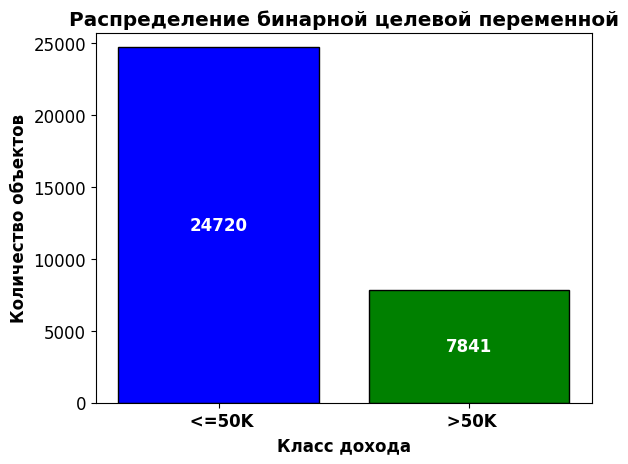

In [ ]:
import matplotlib.pyplot as plt

# Расчет количества объектов в каждом классе
class_counts = data['income'].value_counts()

# Создание столбчатой диаграммы
colors = ['blue', 'green']
plt.bar(class_counts.index, class_counts.values, color=colors, edgecolor='black', width=0.8)

plt.xlabel('Класс дохода', fontweight='bold')
plt.ylabel('Количество объектов', fontweight='bold')
plt.title('Распределение бинарной целевой переменной', fontweight='bold')
plt.ylim(0, class_counts.max() + 1000)  # Установить предел по оси Y
plt.xticks(rotation=0, fontweight='bold')

# Добавление количества объектов в каждом классе на столбчатую диаграмму
for i, count in enumerate(class_counts):
    plt.text(i, count / 2, str(count), ha='center', va='center', color='white', fontweight='bold')

plt.show()


Видим, что классы целевой переменной несбалансированные, поэтому будем применять стратификацию при разделении данных на тренировочную и тестовую выборки

# Data Preprocessing

## Преобразование категориальных признаков в численные

In [ ]:
# Определить столбцы с двумя уникальными значениями
binary_cols = [col for col in data.columns if data[col].dtype == 'object' and data[col].nunique() == 2]

# Определить столбцы для кодирования
encode_cols = [col for col in data.columns if data[col].dtype == 'object' and col not in binary_cols]

# Заменить значения на 0 и 1 в столбцах с двумя уникальными значениями
for col in binary_cols:
    data[col] = data[col].map({label: i for i, label in enumerate(data[col].unique())})

# Кодирование остальных столбцов с типом object
for col in encode_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education_num   32561 non-null  int64
 5   marital_status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital_gain    32561 non-null  int64
 11  capital_loss    32561 non-null  int64
 12  hours_per_week  32561 non-null  int64
 13  native_country  32561 non-null  int64
 14  income          32561 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


Видим, что все признаки теперь имеют целочисленный тип

In [ ]:
data.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.298210,10.080679,2.611836,6.572740,1.446362,3.665858,0.330795,1077.648844,87.303830,40.437456,36.718866,0.240810
std,13.640433,1.455960,1.055500e+05,3.870264,2.572720,1.506222,4.228857,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,7.823782,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [ ]:
data.corr()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
age,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.028718,-0.088832,0.077674,0.057775,0.068756,-0.001151,0.234037
workclass,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.049742,-0.095981,0.033835,0.012216,0.138962,-0.007690,0.051604
fnlwgt,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,-0.021291,-0.026858,0.000432,-0.010252,-0.018768,-0.051966,-0.009463
education,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.014131,0.027356,0.030046,0.016746,0.055510,0.064288,0.079317
education_num,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.031838,-0.012280,0.122630,0.079923,0.148123,0.050840,0.335154
marital_status,-0.266288,-0.064731,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.068013,0.129314,-0.043393,-0.034187,-0.190519,-0.023819,-0.199307
occupation,-0.020947,0.254892,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.006763,-0.080296,0.025505,0.017987,0.080383,-0.012543,0.075468
relationship,-0.263698,-0.090461,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.116055,0.582454,-0.057919,-0.061062,-0.248974,-0.005507,-0.250918
race,0.028718,0.049742,-0.021291,0.014131,0.031838,-0.068013,0.006763,-0.116055,1.000000,-0.087204,0.011145,0.018899,0.041910,0.137852,0.071846
sex,-0.088832,-0.095981,-0.026858,0.027356,-0.012280,0.129314,-0.080296,0.582454,-0.087204,1.000000,-0.048480,-0.045567,-0.229309,0.008119,-0.215980


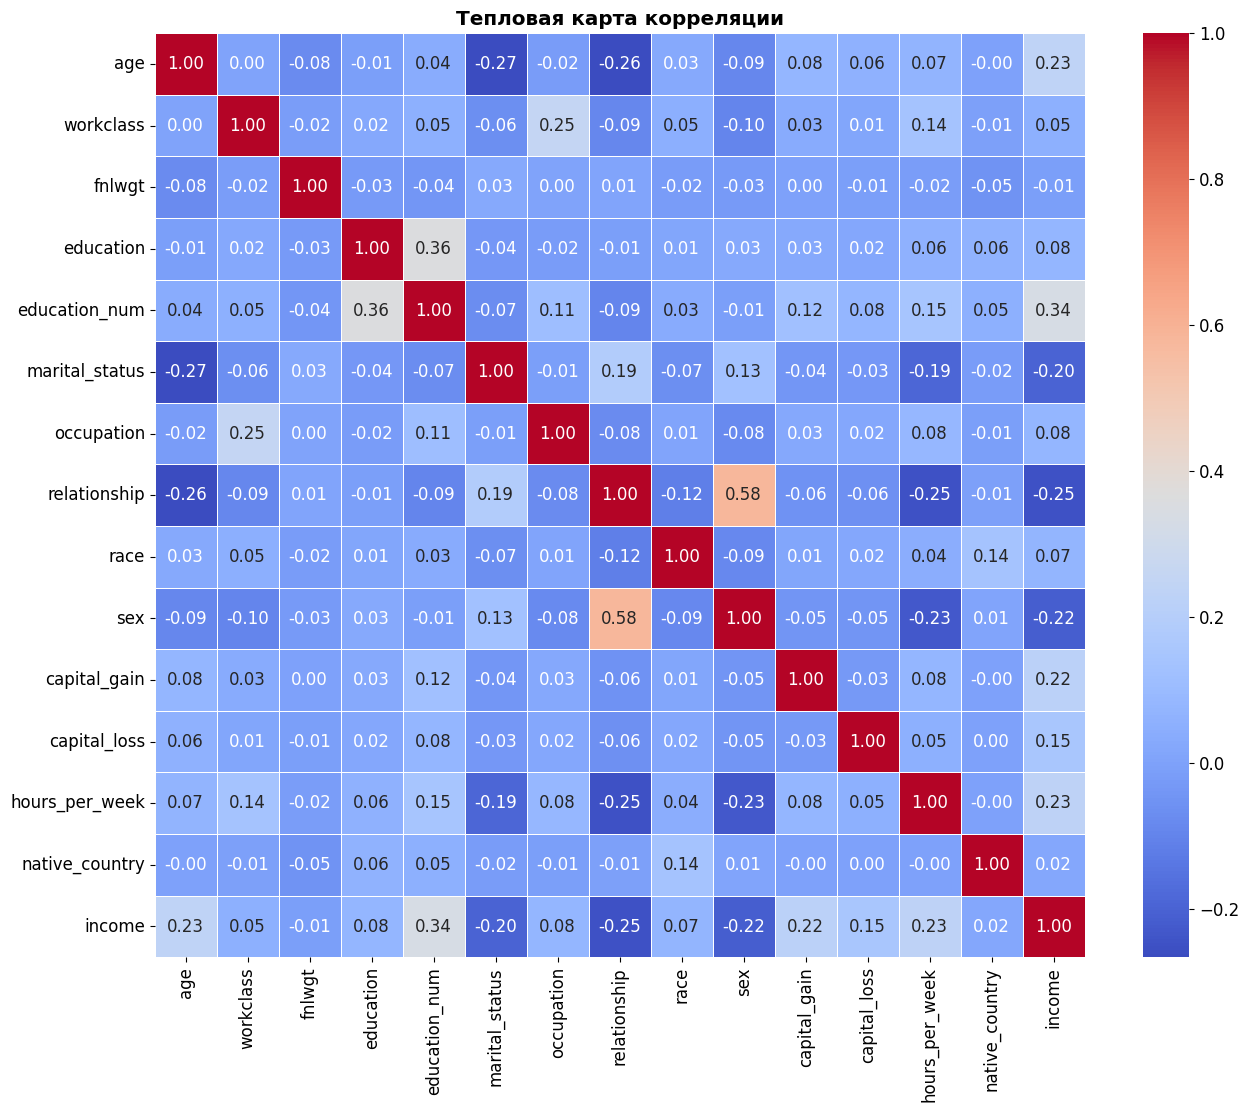

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Посчитать корреляцию
corr = data.corr()

# Создать тепловую карту
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Тепловая карта корреляции', fontweight='bold')
plt.show()


Видим, что 5 признаков в наборе данных оказывают незначительное влияние на целевую переменную и их можно исключить - это workclass, fnlwgt, occupation, race, native_country

In [ ]:
data = data.drop(['workclass', 'fnlwgt', 'occupation', 'race', 'native_country'], axis=1)
data

,age,education,education_num,marital_status,relationship,sex,capital_gain,capital_loss,hours_per_week,income
0,39,9,13,4,1,0,2174,0,40,0
1,50,9,13,2,0,0,0,0,13,0
2,38,11,9,0,1,0,0,0,40,0
3,53,1,7,2,0,0,0,0,40,0
4,28,9,13,2,5,1,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...
32556,27,7,12,2,5,1,0,0,38,0
32557,40,11,9,2,0,0,0,0,40,1
32558,58,11,9,6,4,1,0,0,40,0
32559,22,11,9,4,3,0,0,0,20,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   education       32561 non-null  int64
 2   education_num   32561 non-null  int64
 3   marital_status  32561 non-null  int64
 4   relationship    32561 non-null  int64
 5   sex             32561 non-null  int64
 6   capital_gain    32561 non-null  int64
 7   capital_loss    32561 non-null  int64
 8   hours_per_week  32561 non-null  int64
 9   income          32561 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [ ]:
data.describe()

,age,education,education_num,marital_status,relationship,sex,capital_gain,capital_loss,hours_per_week,income
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.298210,10.080679,2.611836,1.446362,0.330795,1077.648844,87.303830,40.437456,0.240810
std,13.640433,3.870264,2.572720,1.506222,1.606771,0.470506,7385.292085,402.960219,12.347429,0.427581
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,9.000000,2.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,11.000000,10.000000,2.000000,1.000000,0.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,12.000000,4.000000,3.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,15.000000,16.000000,6.000000,5.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


## Model Train and Predict

# Библиотека функций

### Функция для подсчета метрик качества модели бинарной классификации

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def calculate_classification_metrics(y_true, y_pred, model_name):
    """
    Функция для подсчета метрик качества модели бинарной классификации.

    Аргументы:
    y_true -- истинные значения целевой переменной
    y_pred -- предсказанные значения целевой переменной
    model_name -- название модели

    Возвращает словарь с названиями метрик и их значениями.
    """
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'Confusion Matrix': confusion_matrix(y_true, y_pred).tolist()
    }

    return metrics

# Создание и обучение пресета TabularAutoML

In [ ]:
train_data, test_data = train_test_split(
    data,
    test_size = 0.33,
    random_state = random_state)

train_data

,age,education,education_num,marital_status,relationship,sex,capital_gain,capital_loss,hours_per_week,income
27585,51,12,14,2,0,0,0,0,50,1
18010,46,11,9,3,1,0,0,0,40,0
22472,25,9,13,4,3,1,0,0,55,0
4585,27,7,12,4,1,0,0,0,40,0
11191,47,12,14,2,0,0,7688,0,45,1
...,...,...,...,...,...,...,...,...,...,...
29802,47,9,13,2,0,0,0,0,40,0
5390,31,2,8,0,4,1,0,0,21,0
860,18,1,7,4,3,1,0,0,20,0
15795,50,11,9,2,0,0,0,0,84,0


In [ ]:
task = Task(
    'binary',
    metric='accuracy'
)

In [ ]:
roles = {
    'target': 'income',
}

In [ ]:
n_folds = 5
timeout = 60 * 30

In [ ]:
automl = TabularAutoML(
    task = task,
    timeout = timeout,
    cpu_limit = n_threads,
    reader_params = {'n_jobs': n_threads, 'cv': n_folds, 'random_state': random_state}
)

In [ ]:
%%time
model_pred = automl.fit_predict(data, roles = roles, verbose = 1)

[19:41:01] Stdout logging level is INFO.


INFO:lightautoml.automl.presets.base:Stdout logging level is INFO.


[19:41:01] Task: binary



INFO:lightautoml.automl.presets.base:Task: binary



[19:41:01] Start automl preset with listed constraints:


INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:


[19:41:01] - time: 1800.00 seconds


INFO:lightautoml.automl.presets.base:- time: 1800.00 seconds


[19:41:01] - CPU: 4 cores


INFO:lightautoml.automl.presets.base:- CPU: 4 cores


[19:41:01] - memory: 16 GB



INFO:lightautoml.automl.presets.base:- memory: 16 GB



[19:41:01] Train data shape: (32561, 10)



INFO:lightautoml.reader.base:Train data shape: (32561, 10)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:37: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []


[19:41:09] Layer 1 train process start. Time left 1791.89 secs


INFO:lightautoml.automl.base:Layer 1 train process start. Time left 1791.89 secs


[19:41:12] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [17, 18], 'embed_sizes': array([17,  7], dtype=int32), 'data_size': 19}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1e-05 score = 0.7759864885613389
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5e-05 score = 0.8453861507753724
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.0001 score = 0.8519883310302472
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.0005 score = 0.8590511285122063
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.001 score = 0.8615

[19:41:17] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = 0.8635791284051473


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = 0.8635791284051473


[19:41:17] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


[19:41:17] Time left 1783.99 secs



INFO:lightautoml.automl.base:Time left 1783.99 secs

INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's binary_error: 0.135421
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's binary_error: 0.134654
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's binary_error: 0.135268
DEBUG:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[179]	valid's binary_error: 0.13404


[19:41:18] Selector_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Selector_LightGBM fitting and predicting completed


[19:41:20] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task': 'train', 'learning_rate': 0.03, 'num_leaves': 32, 'feature_fraction': 0.7, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 2, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 1200, 'early_stopping_rounds': 200, 'random_state': 42}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's binary_error: 0.131276
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's binary_error: 0.132351
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's binary_error: 0.130969
DEBUG:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[104]	val

[19:41:56] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = 0.8682780012898866


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = 0.8682780012898866


[19:41:56] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


[19:41:56] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 103.00 secs


INFO:lightautoml.ml_algo.tuning.optuna:Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 103.00 secs
INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-270692d5-a50f-4ce9-997d-22da17a9d477
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's binary_error: 0.13711
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's binary_error: 0.137571
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's binary_error: 0.138799
DEBUG:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[147]	valid's binary_error: 0.135268
INFO:optuna.study.study:Trial 0 finished with value: 0.8647320743129127 and parameters: {'feature_fraction': 0.6872700594236812, 'num_leaves': 244, 'bagging_fraction': 0.8659969709057025, 'min_sum_hessian_in_leaf': 0.24810409748678125, 'reg_alpha': 2.5361081166471375e-07, 'reg_lambda': 2.5348407664333426e-07}

[19:43:44] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed


INFO:lightautoml.ml_algo.tuning.optuna:Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed
INFO2:lightautoml.ml_algo.tuning.optuna:The set of hyperparameters {'feature_fraction': 0.9162213204002109, 'num_leaves': 66, 'bagging_fraction': 0.5909124836035503, 'min_sum_hessian_in_leaf': 0.00541524411940254, 'reg_alpha': 5.472429642032198e-06, 'reg_lambda': 0.00052821153945323}
 achieve 0.8700 accuracy


[19:43:44] Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task': 'train', 'learning_rate': 0.05, 'num_leaves': 66, 'feature_fraction': 0.9162213204002109, 'bagging_fraction': 0.5909124836035503, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 5.472429642032198e-06, 'reg_lambda': 0.00052821153945323, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 2, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 3000, 'early_stopping_rounds': 100, 'random_state': 42, 'min_sum_hessian_in_leaf': 0.00541524411940254}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 100 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's binary_error: 0.134347
DEBUG:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[72]	valid's binary_error: 0.1311

[19:43:55] Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = 0.868063020177513


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = 0.868063020177513


[19:43:55] Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed


[19:43:55] Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task_type': 'CPU', 'thread_count': 2, 'random_seed': 42, 'num_trees': 5000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'boost_from_average': True, 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': 100, 'allow_writing_files': False}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_2_CatBoost =====
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 0.8566109	test: 0.8542914	best: 0.8542914 (0)	total: 72.5ms	remaining: 6m 2s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 0.8643274	test: 0.8658068	best: 0.8665745 (89)	total: 1.93s	remaining: 1m 33s
DEBUG:lightautoml.ml_algo.boost_cb:200:	lea

[19:44:12] Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = 0.8661589017536316


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = 0.8661589017536316


[19:44:12] Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed


[19:44:12] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 300.00 secs


INFO:lightautoml.ml_algo.tuning.optuna:Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 300.00 secs
INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-57677f46-d3d1-4307-82fd-58657d09687c
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 0.8547681	test: 0.8542914	best: 0.8542914 (0)	total: 7.32ms	remaining: 36.6s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 0.8638283	test: 0.8648856	best: 0.8659604 (10)	total: 688ms	remaining: 33.4s
INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (100 iterations wait)
INFO3:lightautoml.ml_algo.boost_cb:bestTest = 0.8659603869
INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 10
INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 11 iterations.
INFO:optuna.study.study:Trial 0 finished with value: 0.8659603869184708 and parameters: {'max_depth': 4, 'l2_leaf_reg': 3.6010467344475403, 'min_data_in_leaf': 15}. Best is trial 0 with value: 0.8659603869184708.
INFO3

[19:49:15] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed


INFO:lightautoml.ml_algo.tuning.optuna:Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed
INFO2:lightautoml.ml_algo.tuning.optuna:The set of hyperparameters {'max_depth': 5, 'l2_leaf_reg': 6.380429855820648e-06, 'min_data_in_leaf': 4}
 achieve 0.8696 accuracy


[19:49:15] Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task_type': 'CPU', 'thread_count': 2, 'random_seed': 42, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 6.380429855820648e-06, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 4, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'boost_from_average': True, 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': 100, 'allow_writing_files': False}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 0.8566109	test: 0.8542914	best: 0.8542914 (0)	total: 8.97ms	remaining: 26.9s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 0.8647497	test: 0.8654998	best: 0.8662675 (94)	total: 1.22s	remaining: 35s
DEBUG:lightautoml

[19:49:31] Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = 0.8666809987408249


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = 0.8666809987408249


[19:49:31] Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed


[19:49:31] Time left 1289.98 secs



INFO:lightautoml.automl.base:Time left 1289.98 secs



[19:49:31] Layer 1 training completed.



INFO:lightautoml.automl.base:Layer 1 training completed.



[19:49:31] Blending: optimization starts with equal weights and score 0.8664967292159331


INFO:lightautoml.automl.blend:Blending: optimization starts with equal weights and score 0.8664967292159331


[19:49:31] Blending: iteration 0: score = 0.8682780012898866, weights = [0. 1. 0. 0. 0.]


INFO:lightautoml.automl.blend:Blending: iteration 0: score = 0.8682780012898866, weights = [0. 1. 0. 0. 0.]


[19:49:31] Blending: iteration 1: score = 0.8682780012898866, weights = [0. 1. 0. 0. 0.]


INFO:lightautoml.automl.blend:Blending: iteration 1: score = 0.8682780012898866, weights = [0. 1. 0. 0. 0.]


[19:49:31] Blending: no score update. Terminated



INFO:lightautoml.automl.blend:Blending: no score update. Terminated



[19:49:31] Automl preset training completed in 510.46 seconds



INFO:lightautoml.automl.presets.base:Automl preset training completed in 510.46 seconds



[19:49:31] Model description:
Final prediction for new objects (level 0) = 
	 1.00000 * (5 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM) 



INFO:lightautoml.automl.presets.base:Model description:
Final prediction for new objects (level 0) = 
	 1.00000 * (5 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM) 



CPU times: user 10min 28s, sys: 35.6 s, total: 11min 4s
Wall time: 8min 30s


## Вывод полученной модели

In [ ]:
print(automl.create_model_str_desc())

Final prediction for new objects (level 0) = 
	 1.00000 * (5 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM) 


## Вывод наиболее важных признаков для полученной модели бинарной классификации.

<Axes: xlabel='Feature'>

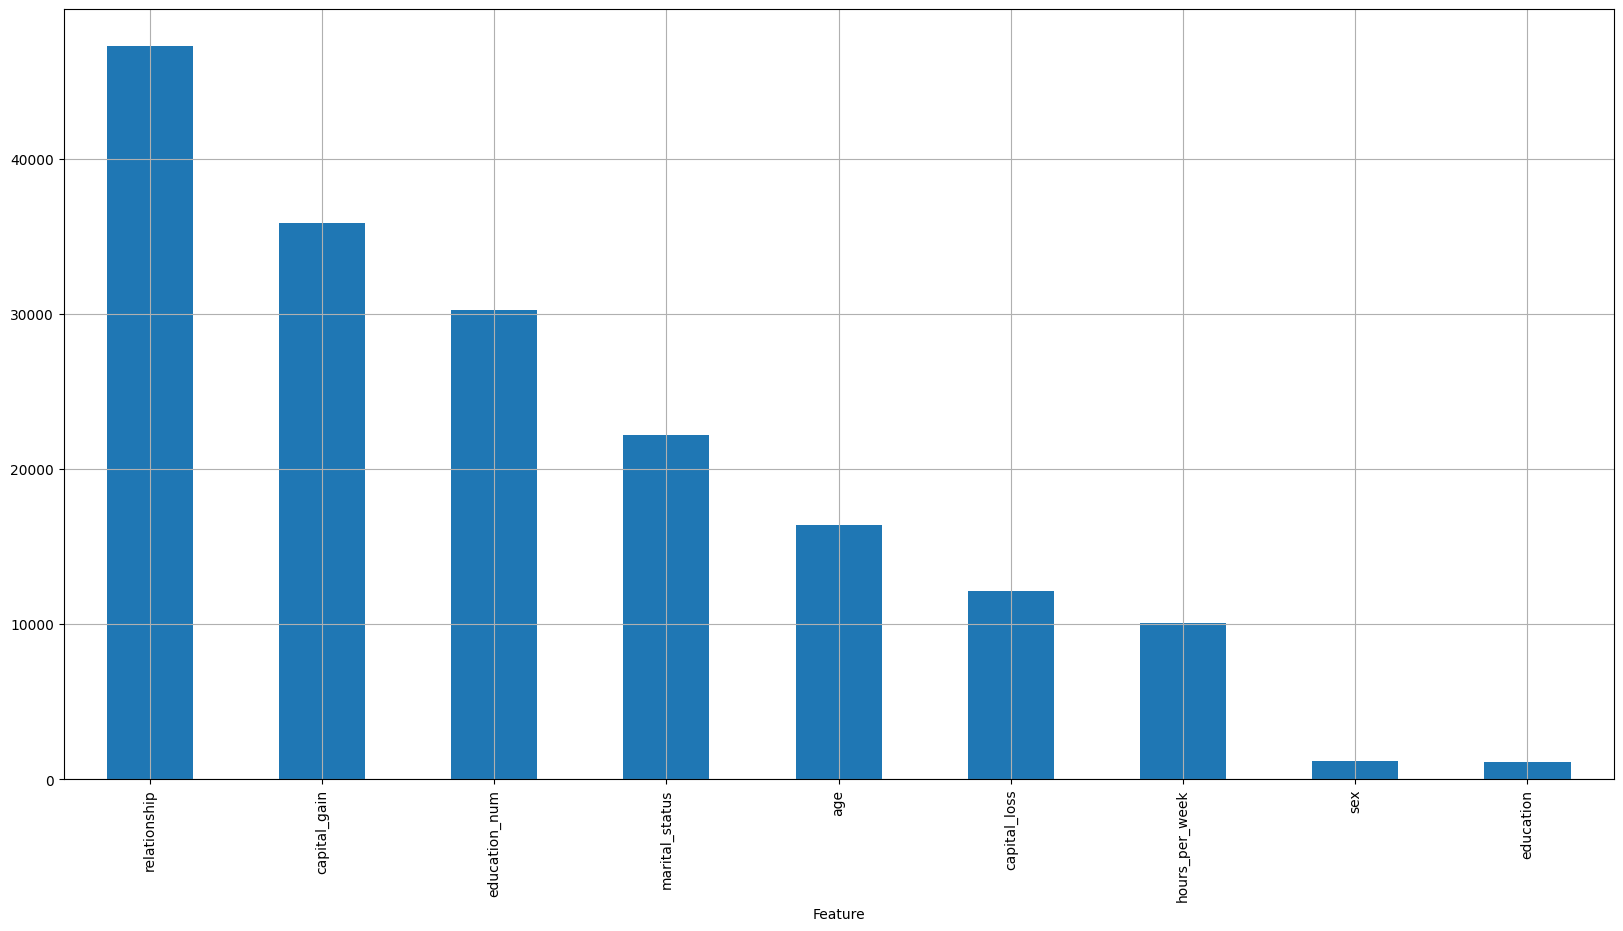

In [ ]:
fi = automl.get_feature_scores('fast')
fi.set_index('Feature')['Importance'].plot.bar(figsize = (20, 10), grid = True)

## Вывод предсказанных значений

In [ ]:
%%time
preds = automl.predict(test_data)
print (f'Предсказанные значения {preds}')
preds = preds.data[:, 0]

Предсказанные значения array([[0.01854959],
       [0.4245914 ],
       [0.58664304],
       ...,
       [0.23028399],
       [0.33744442],
       [0.01891223]], dtype=float32)
CPU times: user 1.24 s, sys: 2.94 ms, total: 1.24 s
Wall time: 785 ms


## Вывод метрик качества построенной модели

In [ ]:
y_test = test_data['income'].values
res_1 = (preds >= 0.5).astype(int)

In [ ]:
metrics_1 = calculate_classification_metrics(y_test, res_1, 'Model TabularAutoML')
print("\nМетрики качества модели:")
for metric, value in metrics_1.items():
    print(f"{metric}: {value}")


Метрики качества модели:
Model: Model TabularAutoML
Accuracy: 0.871394007072399
Precision: 0.7964467005076142
Recall: 0.6152941176470588
F1 Score: 0.6942477876106196
Confusion Matrix: [[7795, 401], [981, 1569]]


In [ ]:
print(classification_report(y_test, res_1))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      8196
           1       0.80      0.62      0.69      2550

    accuracy                           0.87     10746
   macro avg       0.84      0.78      0.81     10746
weighted avg       0.87      0.87      0.87     10746



<Axes: >

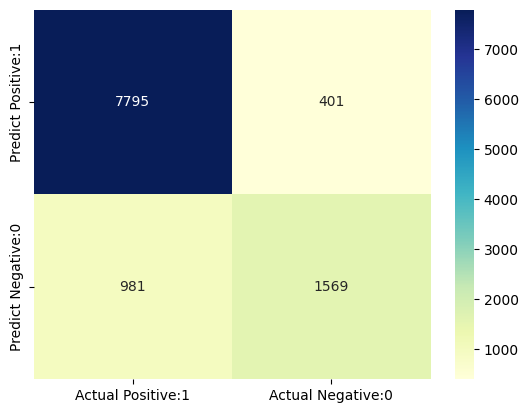

In [ ]:
# Вычисление матрицы путаницы
lr_confusion_matrix = confusion_matrix(y_test, res_1)

# Визуализация матрицы путаницы
cm_matrix = pd.DataFrame(data=lr_confusion_matrix, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

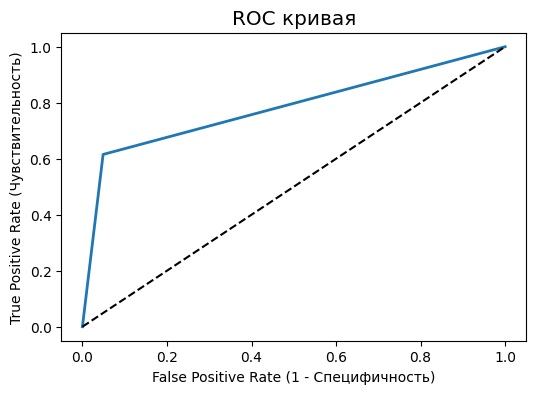

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, res_1, pos_label = 1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC кривая')

plt.xlabel('False Positive Rate (1 - Специфичность)')

plt.ylabel('True Positive Rate (Чувствительность)')

plt.show()

# XGBoostClassifier с подбором гиперпараметров

### Обучим модель XGBoostClassifier на этом же наборе данных. Далее, сравним по метрикам качества модели LAMA и XGBoostClassifier.

In [ ]:
X = data.drop('income', axis=1)
y = data['income']

### Разделение данных на тренировочную и тестовую часть с использованием стратификации

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [ ]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Подбор гиперпараметров модели

In [ ]:
from sklearn.model_selection import GridSearchCV

# Задаем гиперпараметры для поиска
params = {
    'max_depth': [6, 9],
    'learning_rate': [0.1, 0.3],
    'n_estimators': [500, 1000],
    'gamma': [0, 0.1],
    'min_child_weight': [1, 2]
}

# Инициализируем модель
model = XGBClassifier()

# GridSearchCV для подбора гиперпараметров
grid_search = GridSearchCV(model, params, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Вывод лучших гиперпараметров
print("Лучшие гиперпараметры:")
print(grid_search.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:37: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Лучшие гиперпараметры:
{'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 500}


In [ ]:
# Обучение модели с лучшими гиперпараметрами
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Предсказание классов
res_2 = best_model.predict(X_test_scaled)

In [ ]:
metrics_2 = calculate_classification_metrics(y_test, res_2, 'Model XGBoostClassifier')
print("Метрики качества модели:")
for metric, value in metrics_2.items():
    print(f"{metric}: {value}")

Метрики качества модели:
Model: Model XGBoostClassifier
Accuracy: 0.8657174762702401
Precision: 0.7620137299771167
Recall: 0.643353941267388
F1 Score: 0.6976744186046512
Confusion Matrix: [[7638, 520], [923, 1665]]


In [ ]:
print(classification_report(y_test, res_2))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      8158
           1       0.76      0.64      0.70      2588

    accuracy                           0.87     10746
   macro avg       0.83      0.79      0.81     10746
weighted avg       0.86      0.87      0.86     10746



<Axes: >

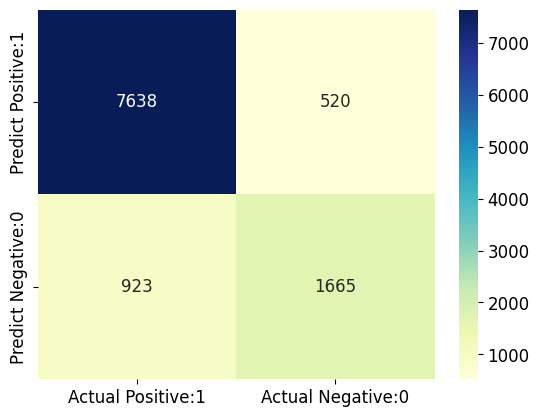

In [ ]:
# Вычисление матрицы путаницы
lr_confusion_matrix = confusion_matrix(y_test, res_2)

# Визуализация матрицы путаницы
cm_matrix = pd.DataFrame(data=lr_confusion_matrix, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

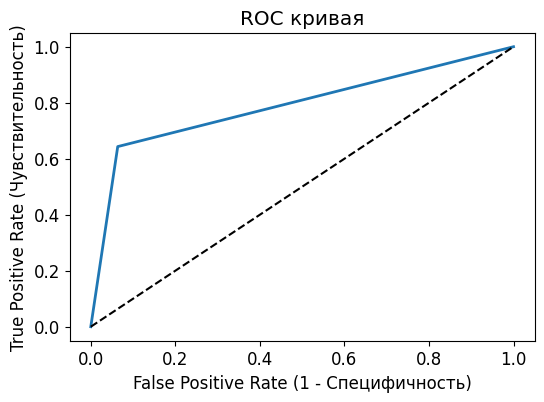

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, res_2, pos_label = 1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC кривая')

plt.xlabel('False Positive Rate (1 - Специфичность)')

plt.ylabel('True Positive Rate (Чувствительность)')

plt.show()

# Model Evaluation

In [ ]:
model_metrics_1_filtered = {key: value for key, value in metrics_1.items() if ((key != 'Model') and (key != 'Confusion Matrix'))}

model_metrics_2_filtered = {key: value for key, value in metrics_2.items() if ((key != 'Model') and (key != 'Confusion Matrix'))}

# Создание DataFrame
df = pd.DataFrame({
    "Model TabularAutoML": model_metrics_1_filtered,
    "Model XGBoostClassifier": model_metrics_2_filtered
})

# Функция для форматирования значений
def format_values(value):
    if isinstance(value, float):
        return "{:.8f}".format(value)
    else:
        return value

# Применение функции к каждому элементу DataFrame
df = df.applymap(format_values)

# Вывод DataFrame как красивой таблицы
display(df)

,Model TabularAutoML,Model XGBoostClassifier
Accuracy,0.87139401,0.86571748
Precision,0.79644670,0.76201373
Recall,0.61529412,0.64335394
F1 Score,0.69424779,0.69767442


# Визуализация метрик качества

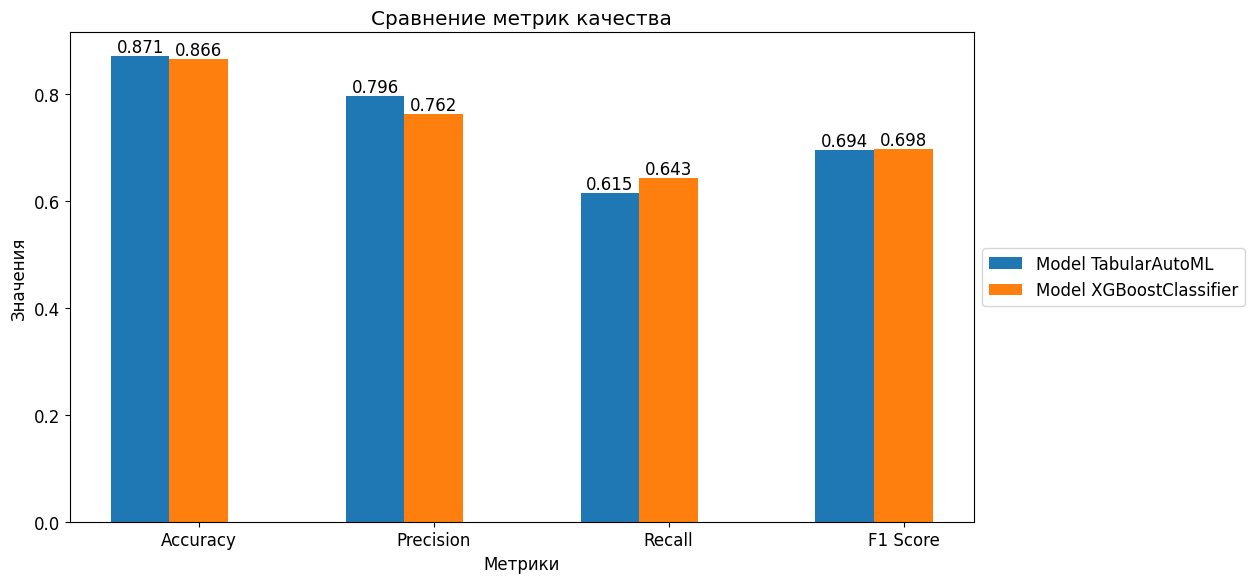

In [ ]:
# Извлечение метрик из словарей
metrics_names = list(model_metrics_1_filtered.keys())
metrics_values_1 = list(model_metrics_1_filtered.values())
metrics_values_2 = list(model_metrics_2_filtered.values())

# Создание подписей для столбцов
model_names = ["Model TabularAutoML", "Model XGBoostClassifier"]

# Создание подписей для оси X (метрик)
x = range(len(metrics_names))

# Ширина столбцов
bar_width = 0.25

# Создание графика
plt.figure(figsize=(10, 6))

# Построение столбчатых диаграмм для каждой метрики
for i, (metric_name, metric_value) in enumerate(zip(metrics_names, [metrics_values_1, metrics_values_2])):
    plt.bar([pos + i * bar_width for pos in x], metric_value, width=bar_width, label=model_names[i])
    # Добавление подписей значений метрик сверху
    for j, value in enumerate(metric_value):
        plt.text(j + i * bar_width, value, f'{value:.3f}', ha='center', va='bottom')

# Добавление подписей к осям и заголовка
plt.xlabel('Метрики')
plt.ylabel('Значения')
plt.title('Сравнение метрик качества')
plt.xticks([pos + bar_width for pos in x], metrics_names)

# Отображение графика
plt.tight_layout()

# Отдельное размещение легенды
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# Вывод: Lama лучше предсказывает целевую переменную, чем XGBoostClassifier с подбором гиперпараметров.